# Rによる回帰分析の実行

**Rコード**

```{R}
# ライブラリーとデータの読み込み
remotes::install_github("itamaracaspi/experimentdatar")
library(experimentdatar)
library(broom)
library(tidyverse)
library(vouchers)

data(vouchers)
vouchers
```
**Pythonコード**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

sns.set(font="IPAexGothic")

In [2]:
df = pd.read_csv("./datas/vouchers.csv")
df.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
0,NaN,0,0,0,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0,0,0,1.0,NaN,12.0,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0,0,0,0.0,NaN,13.0,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1,0,0,1.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


**Rコード**
```R
# Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で浸かる文字列の準備

formula_base <- "VOUCHO"
formula_x_covariate <- "SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + STRATA4 +
    STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 +
    DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 +
    DMONTH7 + DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2"

formula_y <- c(
    "TOTSCYRS", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1", "FINISH6", "FINISH7",
    "FINISH8", "REPT6", "REPT", "NREPT", "MARRIED", "HASCHILD", "HOURSUM", "WORKING3"
)

### formula_yの各要素に対して共変量を含まない回帰式の作成
base_reg_formula <- paste(formula_y, "~", formula_x_base)
names(base_reg_formula) <- paste(formula_y, "base", sep = "_")

### formula_yの各要素に対して共変量を含む回帰式の作成
covariate_reg_formula <- paste(
    formula_y, "~", forumula_x_base, "+", formula_x_covariate
)
names(covariate_reg_formula) <- paste(formula_y, "covariate", sep = "_")


### モデル式のベクトルを作成
table3_formula <- c(base_reg_formula, covariate_reg_formula)

### モデル式のベクトルをデータフレーム化する
model <- table3_formula %>%
    enframe(name = "model_index", value = "formula")

## 回帰分析の実行
### bogota 1995のデータを抽出
regression_data <- vouchers %>% filter(TAB3SMPL == 1, BOG95SMP == 1)

### まとめて回帰分析を実行
df_models <- models %>%
    mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
    mutate(lm_result = map(.x = model, .f = tidy))

### モデルの結果を整形
df_results <- df_models %>%
    mutate(formula = as.character(formula)) %>%
    select(formula, model_index, lm_result) %>%
    unnest(cols = c(lm_result))
```
**Pythonコード**

In [3]:
# Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で浸かる文字列の準備

formula_x_base = "VOUCH0"
formula_x_covariate = """
    SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + STRATA4 +
    STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 +
    DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 +
    DMONTH7 + DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2
"""

formula_y = [
    "TOTSCYRS", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1", "FINISH6", "FINISH7",
    "FINISH8", "REPT6", "REPT", "NREPT", "MARRIED", "HASCHILD", "HOURSUM", "WORKING3"
]

### formula_yの各要素に対して共変量を含まない回帰式の作成
base_reg_formula = {f"{y}_base": f"{y} ~ {formula_x_base}" for y in formula_y}

### formula_yの各要素に対して共変量を含む回帰式の作成
covariate_reg_formula = {f"{y}_covariate": f"{y} ~ {formula_x_base} + {formula_x_covariate}" for y in formula_y}

### モデル式の辞書を作成
table3_formula = base_reg_formula | covariate_reg_formula

### モデル式をDataframeに格納
df_model = pd.DataFrame(
    data=[formula for formula in table3_formula.values()],
    columns=["formula"],
    index=[model_index for model_index in table3_formula.keys()]
)

## 回帰分析の実行
### bogota 1995のデータを抽出
df_regression = df.query("TAB3SMPL == 1 & BOG95SMP == 1")

### まとめて回帰分析を実行
df_model["model"] = df_model["formula"].map(
    lambda x: sm.OLS.from_formula(formula=x, data=df_regression).fit()
)

### モデルの結果を整形
df_result = df_model.assign(
    estimate=lambda df_: df_["model"].map(lambda x: x.params),
    ci_95=lambda df_: df_["model"].map(lambda x: x.conf_int()),
    pvalue=lambda df_: df_["model"].map(lambda x: x.pvalues)
)

## 私立学校への通学と割引券の利用についての分析

**Rコード**
```R
# 通学率と奨学金の利用
using_voucher_results <- df_results %>%
    filter(term == "VOUCH0", str_detect(model_index, "PRSCHA_1|USNGSCH")) %>%
    select(model_index, term, estimate, std.error, p.value) %>%
    arrage(model_index)
```
**Pythonコード**

In [4]:
# 通学率と奨学金の利用
FILTER_TERM = "VOUCH0"

df_using_voucher_results = (
    df_result
    .filter(regex="PRSCHA_1|USNGSCH", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)

display(df_using_voucher_results)

,model_index,term,estimate,lower_ci_95,upper_ci_95,pvalue
1,PRSCHA_1_base,VOUCH0,0.062947,0.029842,0.096052,2.003331e-04
3,PRSCHA_1_covariate,VOUCH0,0.057431,0.024144,0.090718,7.358180e-04
0,USNGSCH_base,VOUCH0,0.508872,0.463709,0.554035,1.796250e-90
2,USNGSCH_covariate,VOUCH0,0.504160,0.459211,0.549109,1.491107e-89


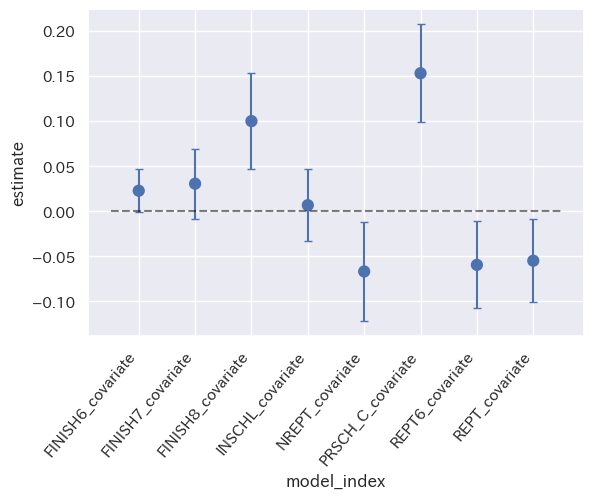

In [5]:
# 留年と進級の傾向
FILTER_TERM = "VOUCH0"

df_using_voucher_results = (
    df_result
    .filter(regex="covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
    .query("model_index.str.contains('FINISH|INSCHL|NREPT|PRSCH_C|REPT')", engine="python")
)

# 留年の傾向を可視化
fig, ax = plt.subplots(1, 1)
sns.pointplot(
    data=df_using_voucher_results,
    x="model_index", 
    y="estimate",
    join=False
)
yerr = [
    df_using_voucher_results["estimate"].to_numpy() - df_using_voucher_results["lower_ci_95"].to_numpy(),
    df_using_voucher_results["upper_ci_95"].to_numpy() - df_using_voucher_results["estimate"].to_numpy()
]
ax.errorbar(
    df_using_voucher_results["model_index"],
    df_using_voucher_results["estimate"],
    yerr=yerr,
    capsize=3,
    linestyle=""
)
 
ax.hlines(
    y=0.0, 
    xmin=-0.5, 
    xmax=len(df_using_voucher_results)-0.5, 
    linestyles="dashed",
    color="black",
    alpha=0.5
)

ax.grid(True)
fig.autofmt_xdate(rotation=50)
plt.show()

## 割引券は私立への入学と奨学金の利用を増やしているか？

**Rコード**
```{R}
# Table.4 & 6の再現
## table4に使うデータを抜き出す
data_tbl4 <– vouchers %>%
    filter(BOG95SMP == 1, TAB3SMPL == 1,
            !is.na(SCYFNSH), !is.na(FINISH6), !is.na(PRSCHA_1),
            !is.na(REPT6), !is.na(NREPT), !is.na(INSCHL),
            !is.na(PRSCH_C), !is.na(FINISH8), !is.na(PRSCHA_2),
            !is.na(TOTSCYRS), !is.na(REPT)
    ) %>%
    select(VOUCH0, SVY, HSVISIT, DJAMUNDI, PHONE, AGE, STRATA1:STRATA6, STRATAMS,
            DBOGOTA, D1993, D1995, D1997, DMONTH1:DMONTH2, SEX_MISS, FINISH6,
            FINISH7, FINISH8, REPT6, REPT, NREPT, SEX2, TOTSCYRS, MARRIED,
            HASCHILD, HOURSUM, WORKING3, INSCHL, PRSCH_C, USNGSCH, PRSCHA_1
    )
    

## 女子生徒のみのデータでの回帰分析
### 女子大生のデータだけ取り出す
regression_data <- data_tbl_bog95 %>% filter(SEX2 == 0)

### まとめて回帰分析を実行
df_models <- models %>%
    mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
    mutate(lm_result = map(.x = model, .f = tidy))
    
### モデルの結果を整形
df_results_female <- df_models %>%
    mutate(formula = as.character(forumula),
            gender = "female") %>%
    select(formula, model_index, lm_result, gender) %>%
    unnest(cols = c(lm_result))
    
## 男子生徒のみのデータでの回帰分析
regression_data <- data_tbl4_bog95 %>% filter(SEX2 == 1)

### まとめて回帰分析を実行
df_models <- models %>%
    mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
    mutate(lm_result = map(.x = model, .f = tidy))
    
### モデルの結果を整形
df_results_male <- df_models %>%
    mutate(formula = as.character(formula),
            gender = "male") %>%
    select(formula, model_index, lm_result, gender) %>%
    unnest(cols = c(lm_result))
```
**Pythonコード**

In [6]:
# Table.4 & 6の再現
## table4に使うデータを抜き出す
df_tbl4_bog95 = (
    df
    .query("BOG95SMP == 1 & TAB3SMPL == 1")
    .dropna(subset=[
        "SCYFNSH", "FINISH6", "PRSCHA_1",
        "REPT6", "NREPT", "INSCHL", "FINISH7",
        "PRSCH_C", "FINISH8", "PRSCHA_2",
        "TOTSCYRS", "REPT"
    ])
    [[
        "VOUCH0", "SVY", "HSVISIT", "DJAMUNDI", "PHONE", "AGE", "STRATA1", "STRATA2",
        "STRATA3", "STRATA4", "STRATA5", "STRATA6", "STRATAMS", "DBOGOTA", "D1993", 
        "D1995", "D1997", "DMONTH1", "DMONTH2", "DMONTH3", "DMONTH4", "DMONTH5", "DMONTH6",
        "DMONTH7", "DMONTH8", "DMONTH9", "DMONTH10", "DMONTH11", "DMONTH12", "SEX_MISS", "FINISH6", "FINISH7", "FINISH8",
        "REPT6", "REPT", "NREPT", "SEX2", "TOTSCYRS", "MARRIED", "HASCHILD", "HOURSUM", 
        "WORKING3", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1"
    ]]
)

## 女子生徒のみのデータでの回帰分析
### 女子大生のデータだけ取り出す
df_regression_data = df_tbl4_bog95.query("SEX2 == 0")

### まとめて回帰分析を実行
df_model["model"] = df_model["formula"].map(
    lambda x: sm.OLS.from_formula(formula=x, data=df_regression_data).fit()
)

### モデルの結果を整形
df_result_female = df_model.assign(
    estimate=lambda df_: df_["model"].map(lambda x: x.params),
    ci_95=lambda df_: df_["model"].map(lambda x: x.conf_int()),
    pvalue=lambda df_: df_["model"].map(lambda x: x.pvalues)
)

## 男子生徒のみのデータでの回帰分析
df_regression_data = df_tbl4_bog95.query("SEX2 == 1")

### まとめて回帰分析を実行
df_model["model"] = df_model["formula"].map(
    lambda x: sm.OLS.from_formula(formula=x, data=df_regression_data).fit()
)

### モデルの結果を整形
df_result_male = df_model.assign(
    estimate=lambda df_: df_["model"].map(lambda x: x.params),
    ci_95=lambda df_: df_["model"].map(lambda x: x.conf_int()),
    pvalue=lambda df_: df_["model"].map(lambda x: x.pvalues)
)

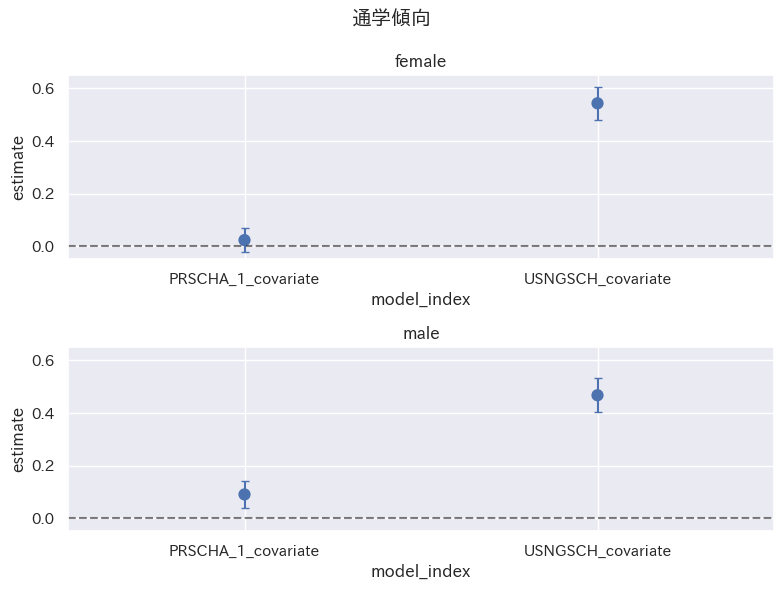

In [7]:
FILTER_TERM = "VOUCH0"

df_result_use_female = (
    df_result_female
    .filter(regex="(PRSCHA_1|USNGSCH)_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)


df_result_use_male = (
    df_result_male
    .filter(regex="(PRSCHA_1|USNGSCH)_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)


fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle("通学傾向")
ax_list = ax.flatten()

# データを男女ごとでplot
for ax, (name, df) in zip(ax_list, {"female": df_result_use_female, "male": df_result_use_male}.items()):
    sns.pointplot(
        data=df,
        x="model_index", 
        y="estimate",
        join=False,
        ax=ax
    )
    ax.set_title(name)
    ax.hlines(
        y=0.0, 
        xmin=-0.5, 
        xmax=len(df)-0.5, 
        linestyles="dashed",
        color="black",
        alpha=0.5
    )
    yerr = [
        df["estimate"].to_numpy() - df["lower_ci_95"].to_numpy(),
        df["upper_ci_95"].to_numpy() - df["estimate"].to_numpy()
    ]
    ax.errorbar(
        df["model_index"],
        df["estimate"],
        yerr=yerr,
        capsize=3,
        linestyle=""
    )
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.05, 0.65)
    ax.grid(True)

plt.tight_layout()
plt.show()

## 私立学校へ通学し続ける効果は？

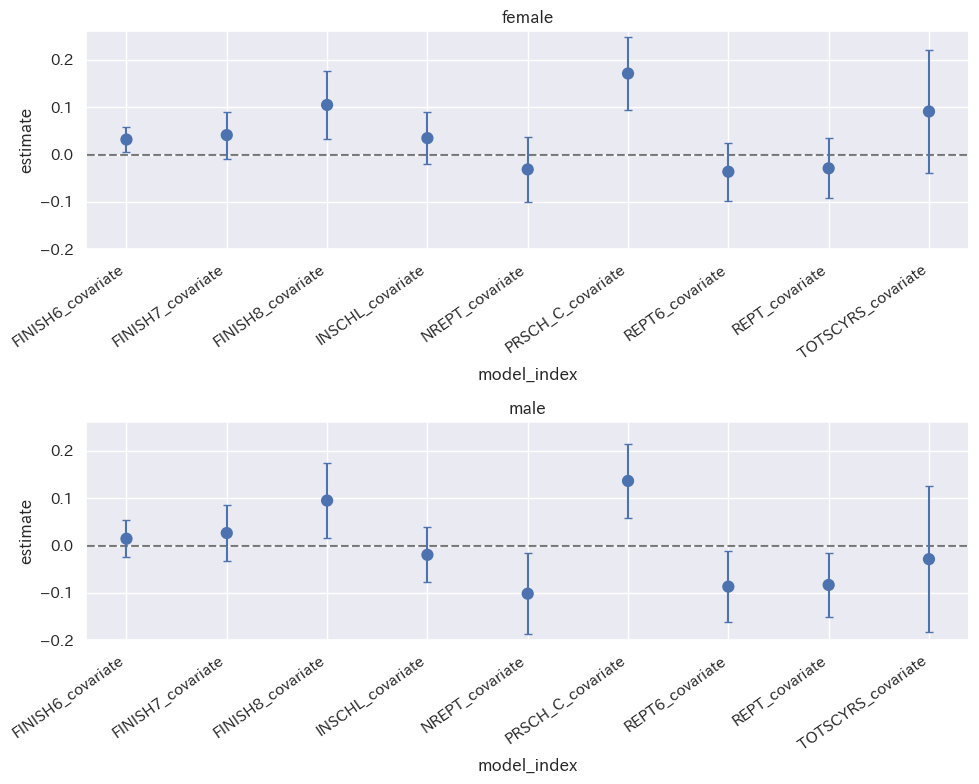

In [8]:
FILTER_TERM = "VOUCH0"

df_result_use_female = (
    df_result_female
    .filter(regex="(FINISH[6-8]|INSCHL|NREPT|PRSCH_C|REPT|REPT6|TOTSCYRS)_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)


df_result_use_male = (
    df_result_male
    .filter(regex="(FINISH[6-8]|INSCHL|NREPT|PRSCH_C|REPT|REPT6|TOTSCYRS)_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax_list = ax.flatten()

# データを男女ごとでplot
for ax, (name, df) in zip(ax_list, {"female": df_result_use_female, "male": df_result_use_male}.items()):
    sns.pointplot(
        data=df,
        x="model_index", 
        y="estimate",
        join=False,
        ax=ax
    )
    ax.set_title(name)
    ax.hlines(
        y=0.0, 
        xmin=-0.5, 
        xmax=len(df)-0.5, 
        linestyles="dashed",
        color="black",
        alpha=0.5
    )
    yerr = [
        df["estimate"].to_numpy() - df["lower_ci_95"].to_numpy(),
        df["upper_ci_95"].to_numpy() - df["estimate"].to_numpy()
    ]
    ax.errorbar(
        df["model_index"],
        df["estimate"],
        yerr=yerr,
        capsize=3,
        linestyle=""
    )
    ax.grid(True)
    ax.set_ylim(-0.20, 0.26)
    plt.setp(ax.get_xticklabels(), rotation=35, ha="right")

plt.tight_layout()
plt.show()

## 女子生徒特有の現象をどう説明するか？

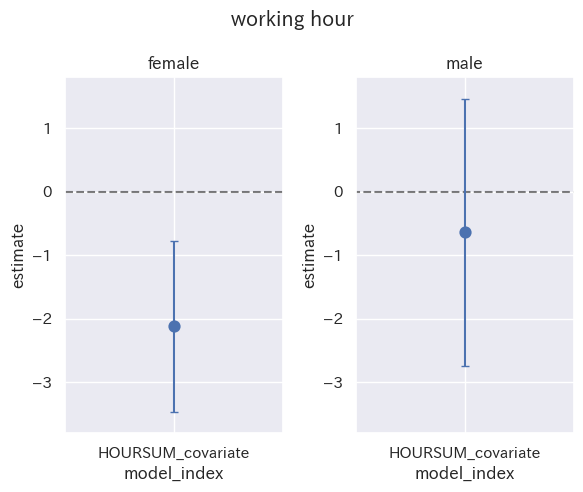

In [9]:
FILTER_TERM = "VOUCH0"

df_result_use_female = (
    df_result_female
    .filter(regex="HOURSUM_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)


df_result_use_male = (
    df_result_male
    .filter(regex="HOURSUM_covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)

fig, ax = plt.subplots(1, 2, figsize=(6, 5))
fig.suptitle("working hour")
ax_list = ax.flatten()

# データを男女ごとでplot
for ax, (name, df) in zip(ax_list, {"female": df_result_use_female, "male": df_result_use_male}.items()):
    sns.pointplot(
        data=df,
        x="model_index", 
        y="estimate",
        join=False,
        ax=ax
    )
    ax.set_title(name)
    ax.hlines(
        y=0.0, 
        xmin=-0.5, 
        xmax=len(df)-0.5, 
        linestyles="dashed",
        color="black",
        alpha=0.5
    )
    yerr = [
        df["estimate"].to_numpy() - df["lower_ci_95"].to_numpy(),
        df["upper_ci_95"].to_numpy() - df["estimate"].to_numpy()
    ]
    ax.errorbar(
        df["model_index"],
        df["estimate"],
        yerr=yerr,
        capsize=3,
        linestyle=""
    )
    ax.grid(True)
    ax.set_ylim(-3.8, 1.8)

plt.tight_layout()
plt.show()